# Inference: Diagnose MCMC results

This example extends from the [inference-adaptive-covariance-mcmc](https://github.com/pints-team/pints/blob/master/examples/inference-adaptive-covariance-mcmc.ipynb), and shows you how to diagnose the output results using 4 different MCMC diagnostic methods.
* [Trace plots](pints.readthedocs.io)
* [Pairwise scatterplots](pints.readthedocs.io)
* [Autocorrelation plot](pints.readthedocs.io)
* [Predicted time series](pints.readthedocs.io)


## Basic MCMC setup

The same setup used in the inference-adaptive-covariance-mcmc example.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
    )

# Create a Bayesian log-likelihood (prior * likelihood)
log_likelihood = pints.LogPosterior(prior, log_likelihood)

# Run an adaptive mcmc routine
x0 = real_parameters * 1.2
mcmc = pints.AdaptiveCovarianceMCMC(log_likelihood, x0)
mcmc.set_verbose(False)

print('Running')
chain = mcmc.run()
chain1 = mcmc.run()
chain2 = mcmc.run()
print('Done!')

Running
Done!


## Use Pints in-built helper module

In [2]:
import pints.plot

## Trace plots

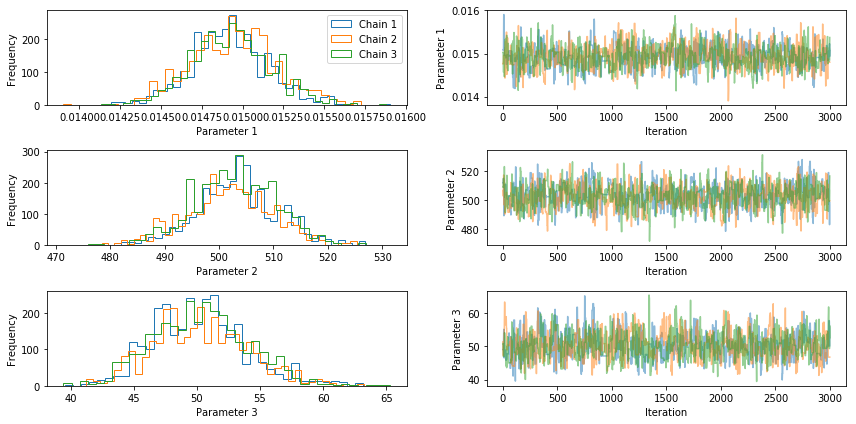

In [3]:
pints.plot.trace(chain, chain1, chain2)

## Pairwise scatterplot

Histogram version (visually good for large sample size)

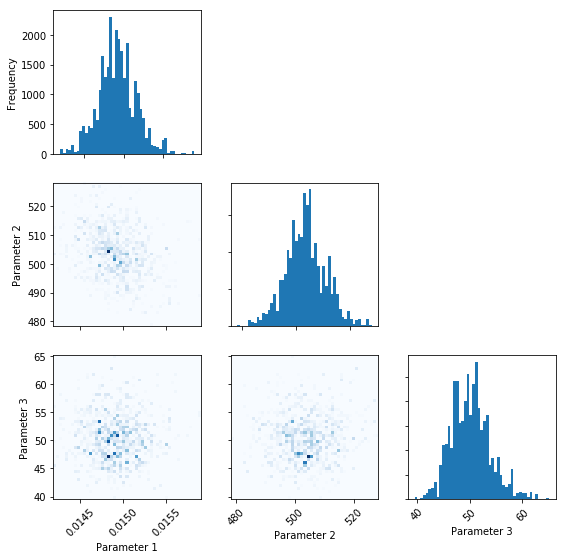

In [4]:
pints.plot.pairwise_scatter(chain, kde=False)

Alternatively, use kernel density estimation (KDE) version (visually good for small sample size)

/usr/lib64/python2.7/site-packages/matplotlib/axes/_base.py:1292: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/usr/lib64/python2.7/site-packages/matplotlib/axes/_base.py:1297: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


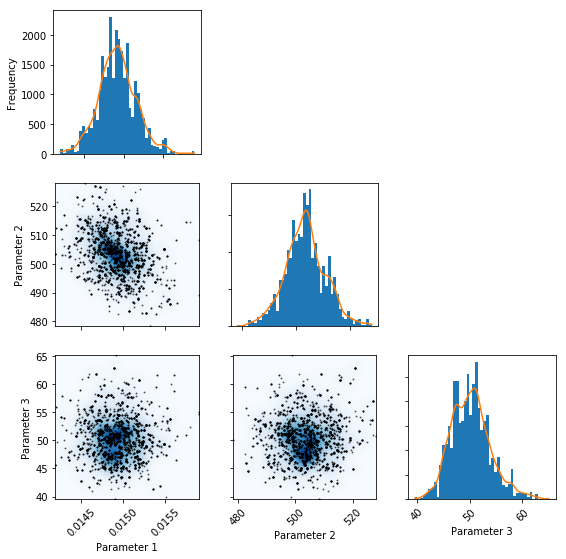

In [5]:
pints.plot.pairwise_scatter(chain, kde=True)

## Autocorrelation plot

In [ ]:
pints.plot.autocorrelation(chain, max_lags=25)

## Predicted time series

Predictions
200


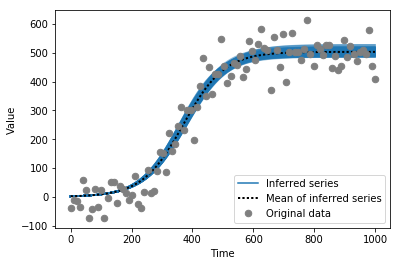

In [8]:
pints.plot.series(chain, problem)

## Re-do customisable version

`Pints` in-built plotting functions are designed to do quick diagnostic/verification for the MCMC output results. The details for the plots shown here are demonstrated in the plotting examples
* [Trace plots](https://github.com/pints-team/pints/blob/master/examples/plot-mcmc-trace-plots.ipynb)
* [Pairwise scatterplots](https://github.com/pints-team/pints/blob/master/examples/plot-mcmc-pairwise-scatterplots.ipynb)
* [Autocorrelation plot](https://github.com/pints-team/pints/blob/master/examples/plot-mcmc-autocorrelation.ipynb)
* [Predicted time series](https://github.com/pints-team/pints/blob/master/examples/plot-mcmc-predicted-time-series.ipynb)